In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import random

# Matriz de confusión

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

y_real = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y_pred = [1, 1, 1, 1, 0, 1, 1, 0, 0, 0]

cm = confusion_matrix(y_real, y_pred)
print (cm)

[[3 2]
 [1 4]]


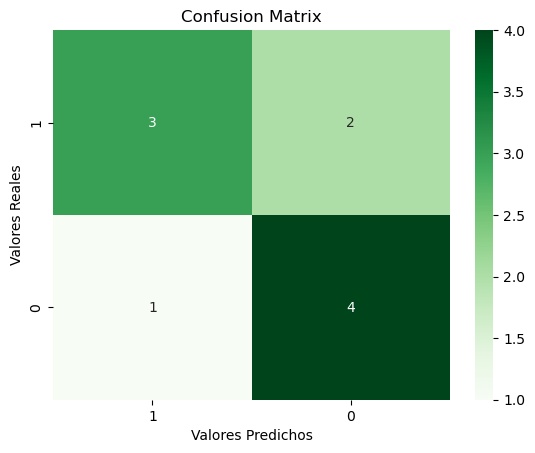

In [5]:
#Creación de Figura
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Greens');
#annot=True to annotate cells, ftm=g to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Valores Predichos');
ax.set_ylabel('Valores Reales');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels([1, 0]);
ax.yaxis.set_ticklabels([1, 0]);
plt.show()

## Ejemplo de uso de matriz de confusión multiclase


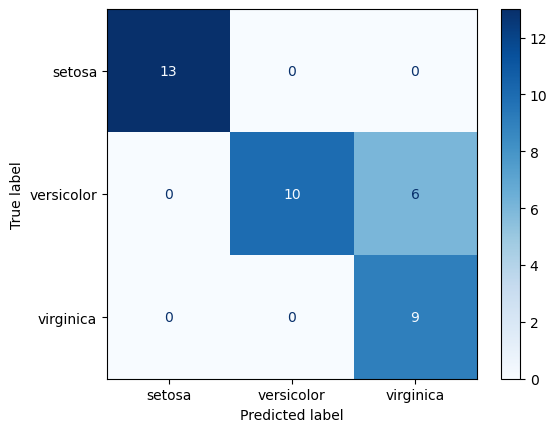

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

#Importación de Iris Dataset
iris = datasets.load_iris()
#Conjunto de ejemplos
X = iris.data
#Clases
y = iris.target
#nombre de las clases
class_names = iris.target_names

# División del DataSet en dos cojuntos: entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Usamos como clasificador Support Vector Classification
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(
      classifier,
      X_test,
      y_test,
      display_labels=class_names,
      cmap=plt.cm.Blues
)


plt.show()


# Métricas de evaluación

## Accuracy

In [7]:
from sklearn.metrics import accuracy_score
y_pred =['A','A','A','A','A','A','A','A','B','A','A','B','B','B','B','B','B','B','B','B']
y_true =['A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B']
print(accuracy_score(y_true, y_pred))


0.85


## Precission

In [8]:
from sklearn.metrics import precision_score
y_pred =['A','A','A','A','A','A','A','A','B','A','A','B','B','B','B','B','B','B','B','B']
y_true =['A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B']

print(precision_score(y_true, y_pred, labels=['A', 'B'], pos_label='A', average="binary"))

0.8


## Recall

In [9]:
from sklearn.metrics import recall_score
y_pred =['A','A','A','A','A','A','A','A','B','A','A','B','B','B','B','B','B','B','B','B']
y_true =['A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B']

print(recall_score(y_true, y_pred, labels=['A', 'B'], pos_label='A', average="binary"))

0.8888888888888888


## Log Loss

In [10]:
from sklearn.metrics import log_loss
y_pred =[0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1]
y_true =[0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]
print(log_loss(y_true, y_pred))

5.406548008367573


## F1-Score

In [11]:
from sklearn.metrics import f1_score
y_pred =['A','A','A','A','A','A','A','A','B','A','A','B','B','B','B','B','B','B','B','B']
y_true =['A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B']

print(f1_score(y_true, y_pred, average="weighted"))

0.8503759398496241


## Curvas ROC y AUC


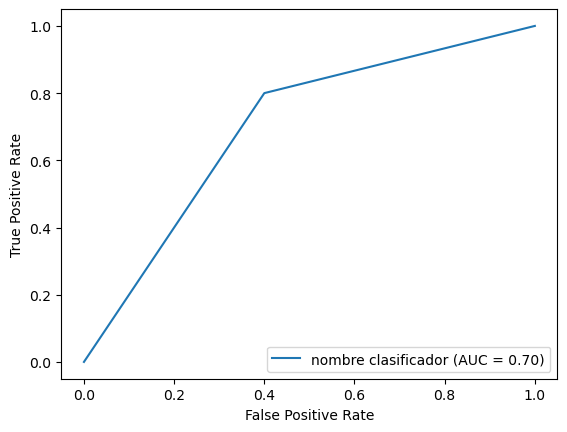

In [12]:
#Curva ROC y área AUC
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

y_true = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y_pred = [1, 1, 1, 1, 0, 1, 1, 0, 0, 0]

#calculo el ratio de verdaderos positivos y falsos positivos.
fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)

#con estos valores obtengo el valor para la AUC
roc_auc = metrics.auc(fpr, tpr)

#genero el gráfico
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='nombre clasificador')
display.plot()

plt.show()


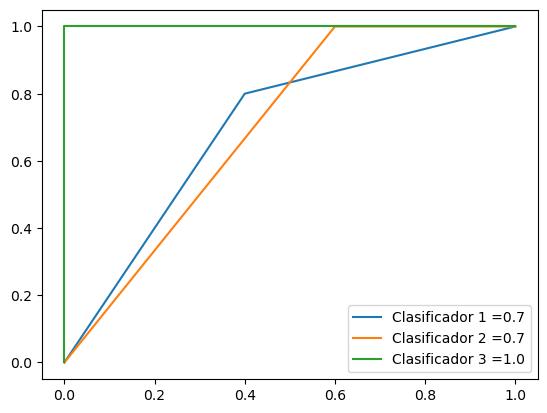

In [13]:
#Curva ROC y área AUC
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

#primer clasificador
y_true =  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y_pred1 = [1, 1, 1, 1, 0, 1, 0, 0, 0, 1]
y_pred2 = [1, 1, 1, 1, 1, 0, 1, 1, 1, 0]
y_pred3 = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

fpr, tpr, _ = metrics.roc_curve(y_true, y_pred1)
roc_auc = round(metrics.auc(fpr, tpr),2)
plt.plot(fpr,tpr,label="Clasificador 1 ="+str(roc_auc))

#segundo clasificador
fpr, tpr, _ = metrics.roc_curve(y_true, y_pred2)
roc_auc = round(metrics.auc(fpr, tpr),2)
plt.plot(fpr,tpr,label="Clasificador 2 ="+str(roc_auc))

#tercer clasificador
fpr, tpr, _ = metrics.roc_curve(y_true, y_pred3)
roc_auc = round(metrics.auc(fpr, tpr),2)
plt.plot(fpr,tpr,label="Clasificador 3 ="+str(roc_auc))

plt.legend()


## Informe global

In [14]:
from sklearn.metrics import classification_report
y_pred =['A','A','A','A','A','A','A','A','B','A','A','B','B','B','B','B','B','B','B','B']
y_true =['A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B']

print(classification_report(y_true, y_pred, labels=['A', 'B']))

              precision    recall  f1-score   support

           A       0.80      0.89      0.84         9
           B       0.90      0.82      0.86        11

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



### En un ejemplo

In [15]:
from sklearn.metrics import classification_report

#podemos definir la siguiente función para mostrar accuracy, el report y la matriz de confusion
def print_score(clf, X_train, y_train, X_test, y_test):
  pred = clf.predict(X_test)
  clf_report = pd.DataFrame(classification_report(y_test,
                                                    pred,
                                                    output_dict=True))
  print("Test Result:\n================================================")
  print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
  print("_______________________________________________")
  print(f"CLASSIFICATION REPORT:\n{clf_report}")
  print("_______________________________________________")
  print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
  print('\n')

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


#cargo dataset iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

#creo conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

#normalizo
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', C=0.1)
svm.fit(X_train, y_train)

print_score(svm, X_train, y_train, X_test, y_test)


Test Result:
Accuracy Score: 97.78%
_______________________________________________
CLASSIFICATION REPORT:
              0          1          2  accuracy  macro avg  weighted avg
precision   1.0   0.937500   1.000000  0.977778   0.979167      0.979167
recall      1.0   1.000000   0.933333  0.977778   0.977778      0.977778
f1-score    1.0   0.967742   0.965517  0.977778   0.977753      0.977753
support    15.0  15.000000  15.000000  0.977778  45.000000     45.000000
_______________________________________________
Confusion Matrix: 
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]



